In [50]:
# Center of Mass Position and Velocity                                                                                 

# import modules                                                                                                       
import numpy as np
import astropy.units as u
import pygadgetreader as pyg
import matplotlib.pyplot as plt


In [51]:
class CenterOfMass:

    def __init__(self,ptype):
        # Input:  Ptype is an integer 1,2 or 3 where 1, 2, 3 specify if you want disk, bulge or halo
        # read in the snapshot using pygadget reader 
        # and store positions and velocities and masses of the given particle type as arrays
        # you will need an if statement here to specify what gets loaded using pygadget reader
         
        if ptype == 1:
            a = "disk"
        elif ptype == 2:
            a = "bulge"
        elif ptype == 3:
            a = "dm"
        else:
            print ("invalid input")
        
        self.pos = pyg.readsnap("../sims/MW_1M_db_010", "pos", a)
        self.vel = pyg.readsnap("../sims/MW_1M_db_010",'vel', a)
        self.mass = pyg.readsnap("../sims/MW_1M_db_010", "mass", a)
        #properties of the object
        
        
    # EXAMPLE FUNCTION 
    def total_mass(self):
        # function that RETURNS THE TOTAL MASS OF THE DISK 
        # output: Mass is units of Msun
        # self allows you to call functions anytime without defining it again
        #Note: you can add other keyword arguments into the function, but 'self' must be first                         
        
        return np.sum(self.mass)*1e10
    
    
    def total_mass_inr(self, k):
        #function that RETURNS THE MASS OF THE DISK WITHIN A GIVEN RADIUS
        # we are using k to be able to ask for any radius that we want 
        # the function  np.where  is useful here.  
        
        xpos= self.pos[:,0]
    
        ypos= self.pos[:,1]
    
        zpos= self.pos[:,2]

        r_disk = np.sqrt(xpos**2 + ypos**2 + zpos**2)
        #print (xpos[0], ypos[0], zpos[0], r_disk[0]) 
        

        rindex = np.where(r_disk<k)[0]   
        # [0] forces the array into one columm
        #print (r_disk[rindex[0]]) # prints the value of r_disk for the first particle that has r< 20  
        #print (rindex[0]) # prints the index in the r_disk array of the first particle that has r < 20  
        #print (np.max(r_disk[rindex])) #prints the max value of the r_disk array that should have all particles with r < 20
        # check that max should be less than 20 
        
        mass_rcut = self.mass[rindex] 
        #returns the mass withing the given radius
        
        
        
        return np.sum(mass_rcut)*1e10
    
    def mass_profile(self, maxradius, interval=2):
        #the inputs are: the maximum radius we want to consider
        #the interval takes in how we wwant divide the inteval [0,maxradius] (the number of steps)
        #outputs: the mass contained within the specified radius
    
        
        r = np.arange(0, maxradius, interval)
        #we're creating a list of r. starts at 0, goes to maxradius & it takes in the subdivisions of the interval
        
        mass = [self.total_mass_inr(i) for i in r]
        #we call the funtion that returns the mass contained within a given radius and it sums it up from 0 to maxradius.
        
        return mass,r
    
        
        
        

# make a plot of the mass profile, plot the mass of the disk (whithin 20kpc) as a function of radius 
#later do bulge and halo


In [52]:
                                                                                                                                                                                     
# Create a Center of mass object for the MW DISK PARTICLES, BULGE, AND DM.                                                                          
MWCOM = CenterOfMass(1)
MWCOM_BULGE= CenterOfMass(2)
MWCOM_HALO = CenterOfMass(3) 
#calling initial function CenterOfMass with the disk, bulge and DM input
#prints the properties of the objects


Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Mass
Returning BULGE Positions
Returning BULGE Velocities
Returning BULGE Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass


In [53]:
np.sum(MWCOM.mass)
#total MW mass

5.78837

In [54]:
MWCOM.total_mass_inr(15)
#total MW mass within r=15 kpc

55774965286.25488

In [55]:
# EXAMPLE
# Return total disk mass 

MW_Diskmass = MWCOM.total_mass()
print("MW Disk Mass:", MW_Diskmass)

MW Disk Mass: 57883701324.46289


In [56]:
#object of the class, calling a function within the propertie of the class
m, r = MWCOM.mass_profile(20) 
mb, rb = MWCOM_BULGE.mass_profile(20)
mdm, rdm = MWCOM_HALO.mass_profile(20)


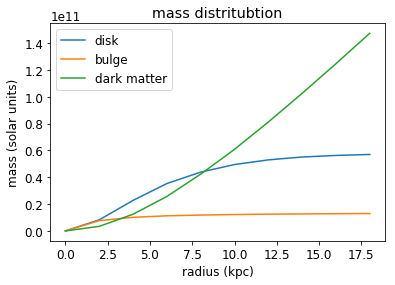

<Figure size 504x504 with 0 Axes>

In [57]:

plt.plot(r,m, label="disk")
plt.plot(rb, mb, label="bulge")
plt.plot(rdm, mdm, label="dark matter")
plt.title('mass distritubtion')
plt.axis()
plt.ylabel('mass (solar units)')
plt.xlabel('radius (kpc)')
plt.legend()
fig = plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 12})

In [58]:
mdm100, rdm100 = MWCOM_HALO.mass_profile(100)

Text(0.5,0,'radius (kpc)')

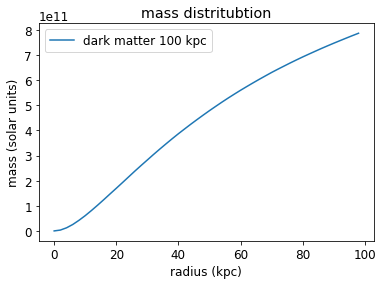

In [59]:
plt.plot(rdm100, mdm100, label="dark matter 100 kpc")
plt.legend()
plt.title('mass distritubtion')
plt.axis()
plt.ylabel('mass (solar units)')
plt.xlabel('radius (kpc)')

In [60]:
mdm500, rdm500 = MWCOM_HALO.mass_profile(500, 10)

Text(0.5,0,'radius (kpc)')

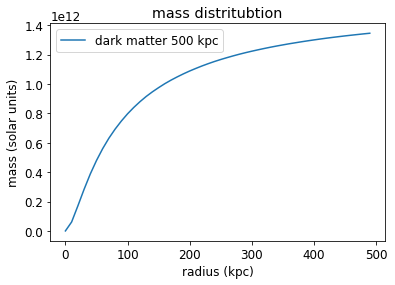

In [61]:
plt.plot(rdm500, mdm500, label = "dark matter 500 kpc")
plt.legend()
plt.title('mass distritubtion')
plt.axis()
plt.ylabel('mass (solar units)')
plt.xlabel('radius (kpc)')

In [ ]:
def COMdefine(self, ):
    
    